# **Correlogram Plots with R packages corrplot, GGally, psych**


In [1]:
install.packages("gapminder")
install.packages("tidyverse")
install.packages("ggplot2")
install.packages("corrplot")
install.packages("GGally")
install.packages("psych")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘textshaping’, ‘ragg’


Warning message in install.packages("tidyverse"):
“installation of package ‘textshaping’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installation of package ‘ragg’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installation of package ‘tidyverse’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library(gapminder)
library(tidyverse)
library(ggplot2)
library(corrplot)
library(GGally)
library(psych)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.2.0     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

corrplot 0.92 loaded

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




In [3]:
data1 <- mtcars

In [4]:
t(data1 %>% map(~sum(is.na(.))))

mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0,0,0,0,0,0


## __Corrplot package__

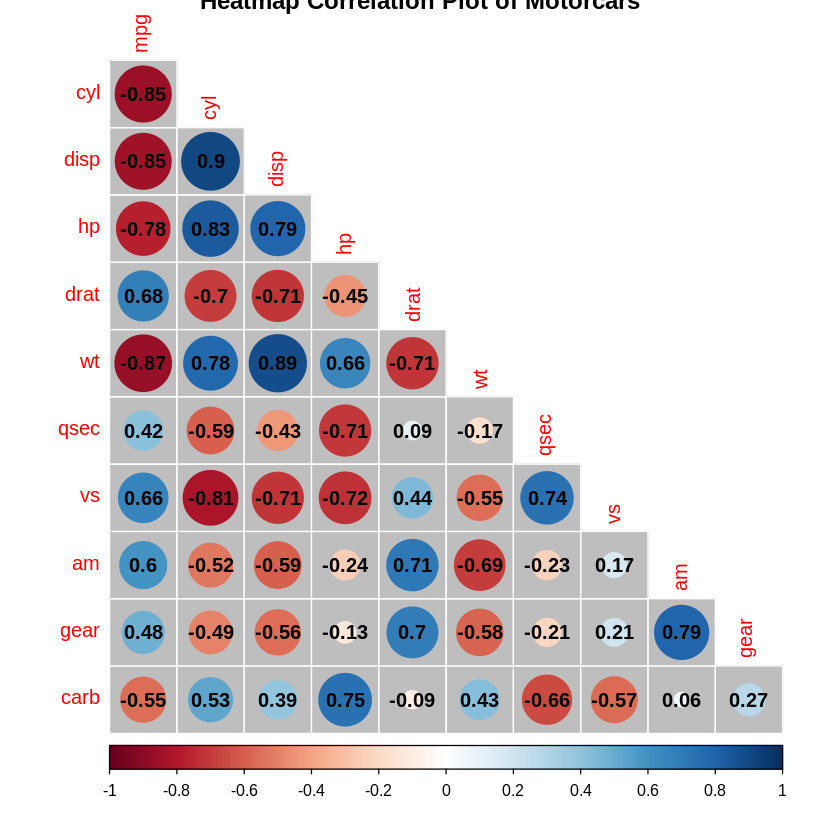

In [5]:
# ?corrplot  
corrplot(corr=cor(mtcars),
         method="circle",
         title="Heatmap Correlation Plot of Motorcars",
         type="lower",
         bg="grey",
         diag=FALSE,
         addCoef.col="black",
         addgrid.col="white"
)

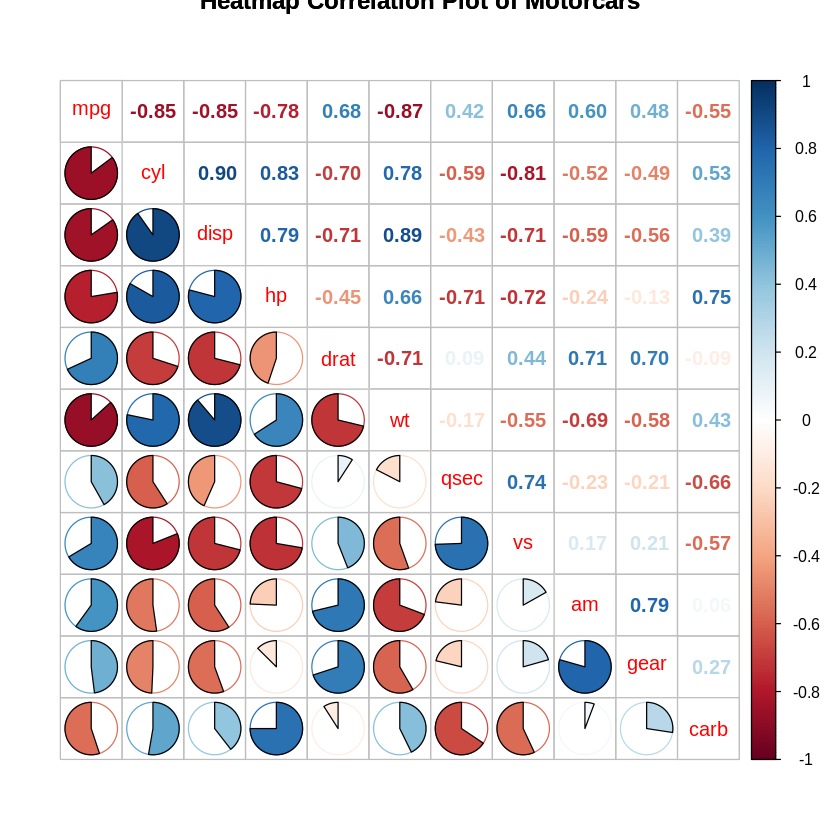

In [6]:
corrplot.mixed(corr=cor(mtcars),
         lower="pie",
         upper="number",
         title="Heatmap Correlation Plot of Motorcars",
         addgrid.col="white",
         bg="grey"
)

## __GGally package__

In [7]:
data1 <- gapminder
glimpse(data1)

Rows: 1,704
Columns: 6
$ country   <fct> "Afghanistan", "Afghanistan", "Afghanistan", "Afghanistan", …
$ continent <fct> Asia, Asia, Asia, Asia, Asia, Asia, Asia, Asia, Asia, Asia, …
$ year      <int> 1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, …
$ lifeExp   <dbl> 28.801, 30.332, 31.997, 34.020, 36.088, 38.438, 39.854, 40.8…
$ pop       <int> 8425333, 9240934, 10267083, 11537966, 13079460, 14880372, 12…
$ gdpPercap <dbl> 779.4453, 820.8530, 853.1007, 836.1971, 739.9811, 786.1134, …


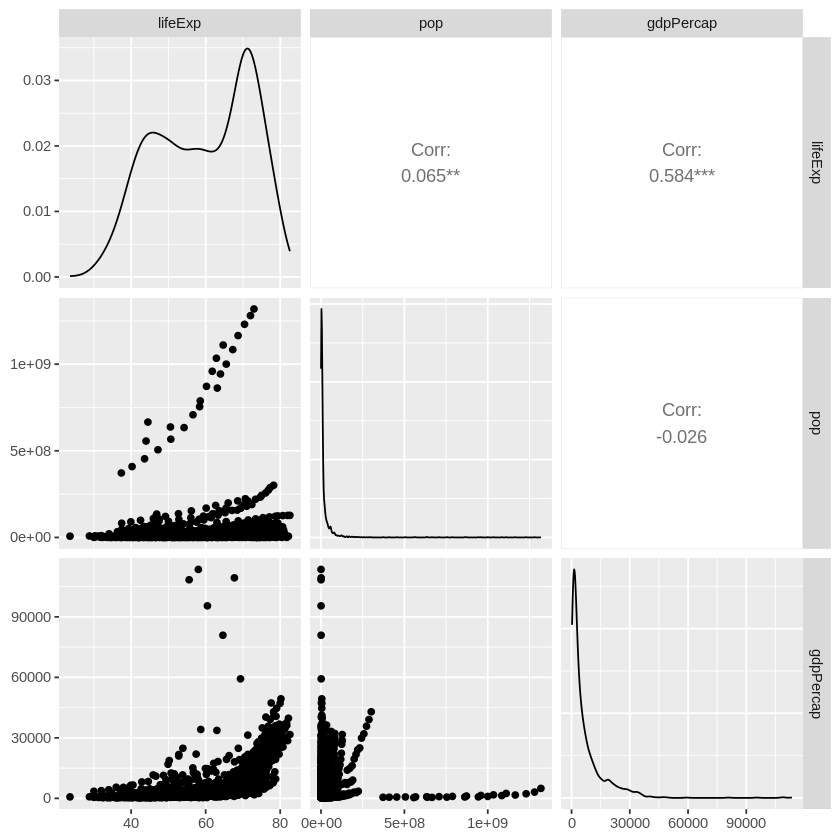

In [8]:
#?GGally::ggpairs
GGally::ggpairs(data1, columns=4:6)  # GGally only takes numeric variables to correlate

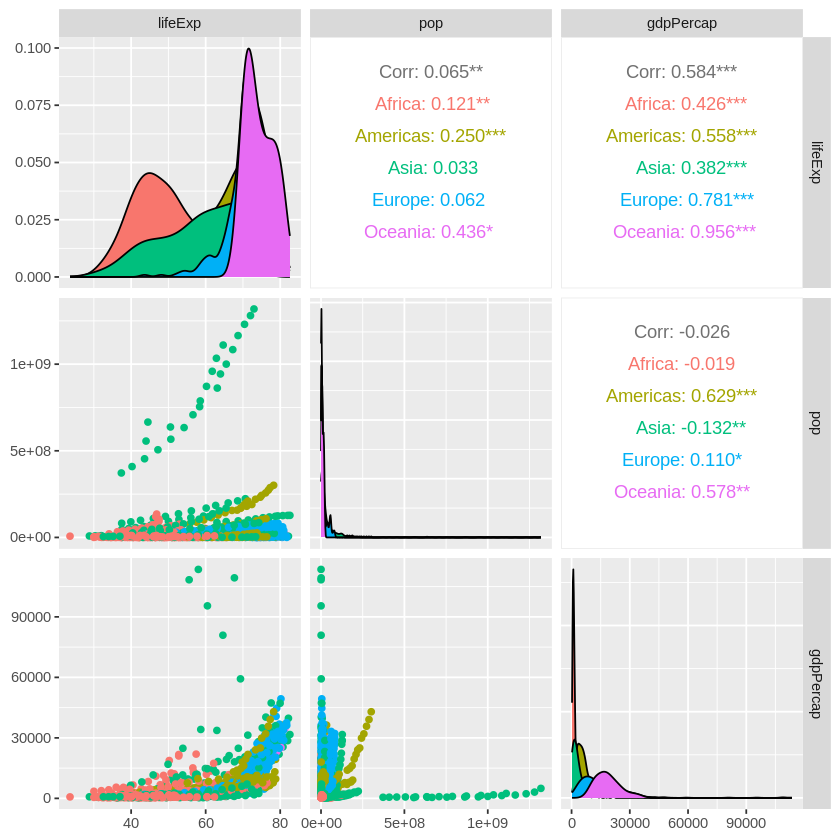

In [9]:
GGally::ggpairs(data1, columns=4:6,
                ggplot2::aes(colour=continent)
)

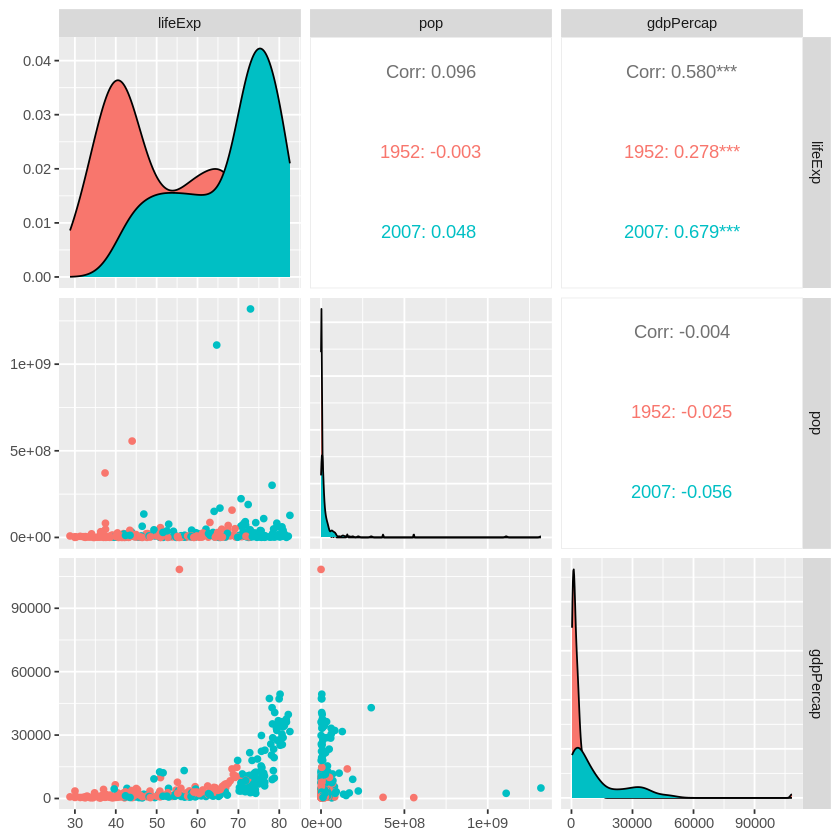

In [10]:
data2 <- gapminder  |>
  filter(year==min(year) | year==max(year)) |>
  mutate(year=as.factor(year))

GGally::ggpairs(data2, columns=4:6,
                ggplot2::aes(colour=year)
)

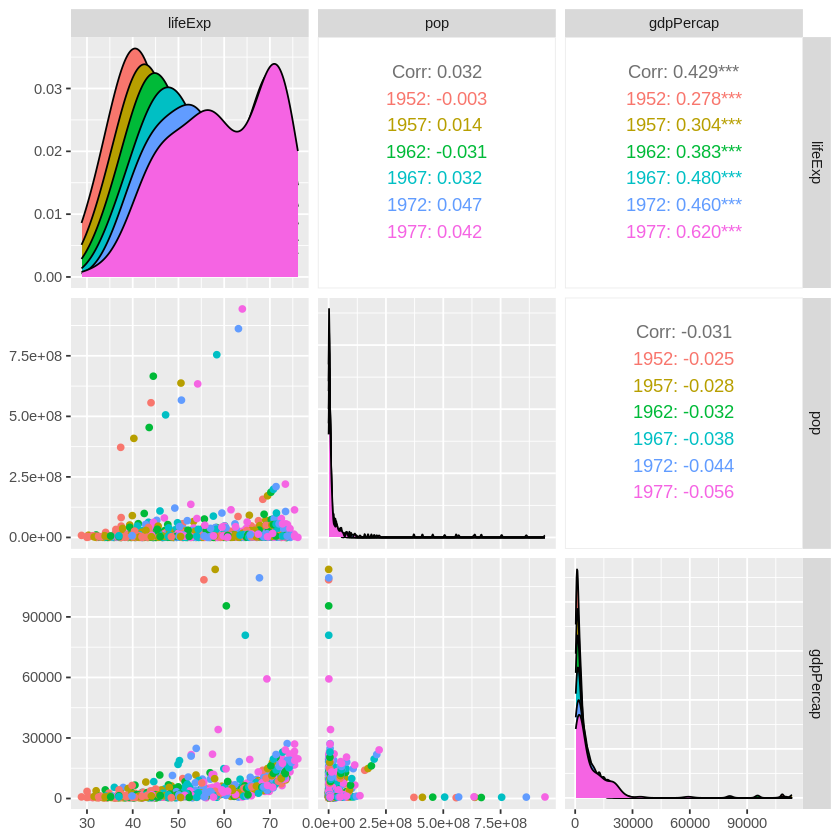

In [11]:
data2 <- gapminder  |>
  filter(year<mean(year)) |>
  mutate(year=as.factor(year))

GGally::ggpairs(data2, columns=4:6,
                ggplot2::aes(colour=year)
)

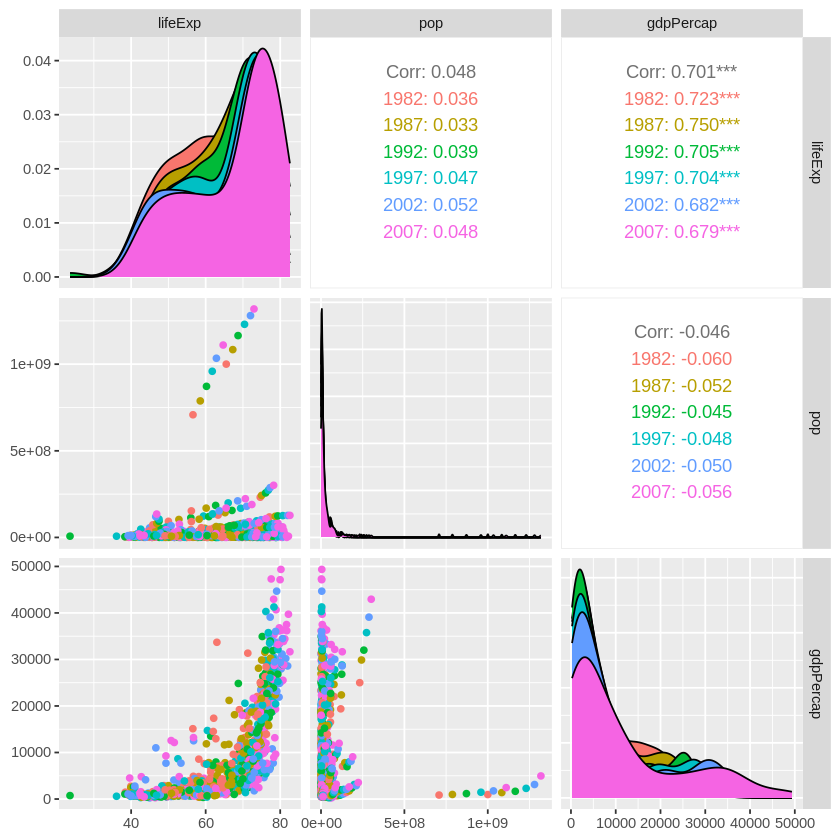

In [12]:
data2 <- gapminder  |>
  filter(year>mean(year)) |>
  mutate(year=as.factor(year))

GGally::ggpairs(data2, columns=4:6,
                ggplot2::aes(colour=year)
)

## __Psych package__

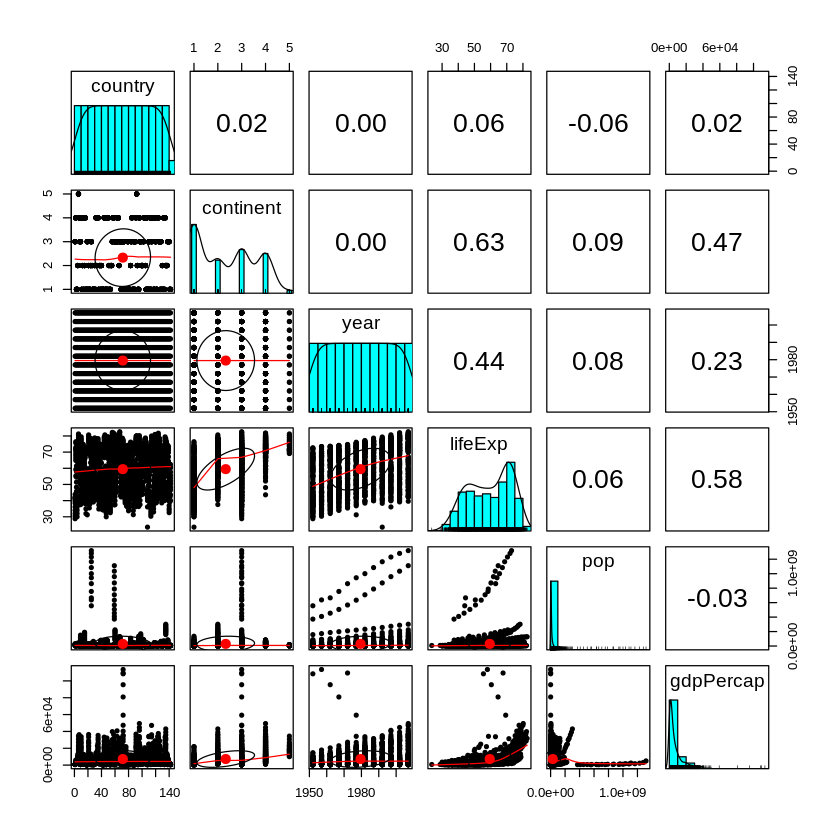

In [13]:
# ?pairs.panels
pairs.panels(x=data1) # psych package takes factorial vars,
                      # but hihgly sparse categorical data becomes less meaningful

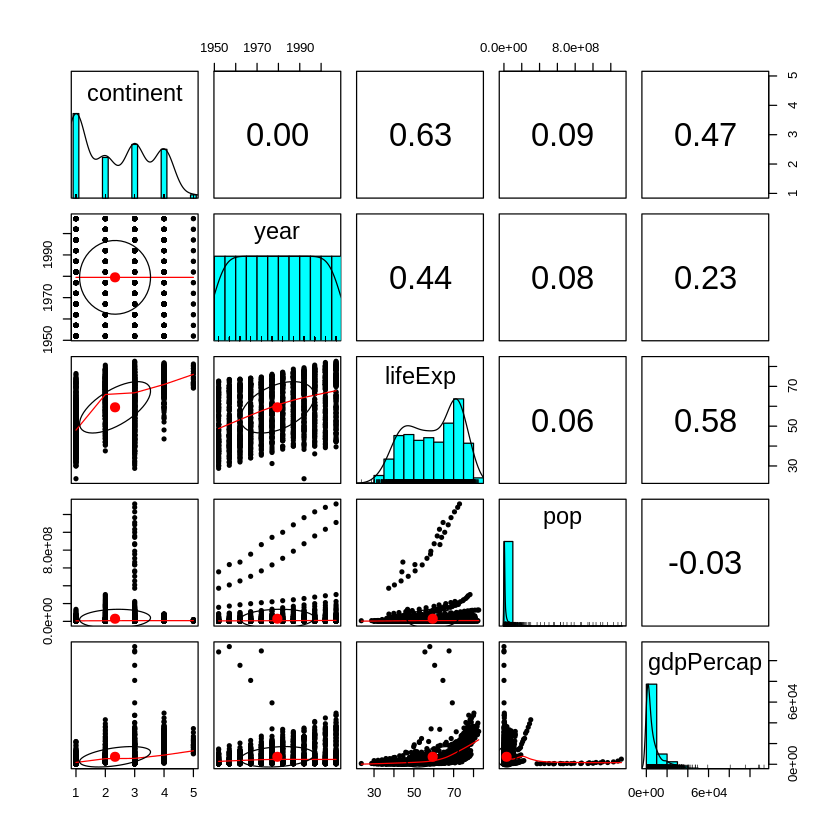

In [14]:
pairs.panels(x=data1[2:6])

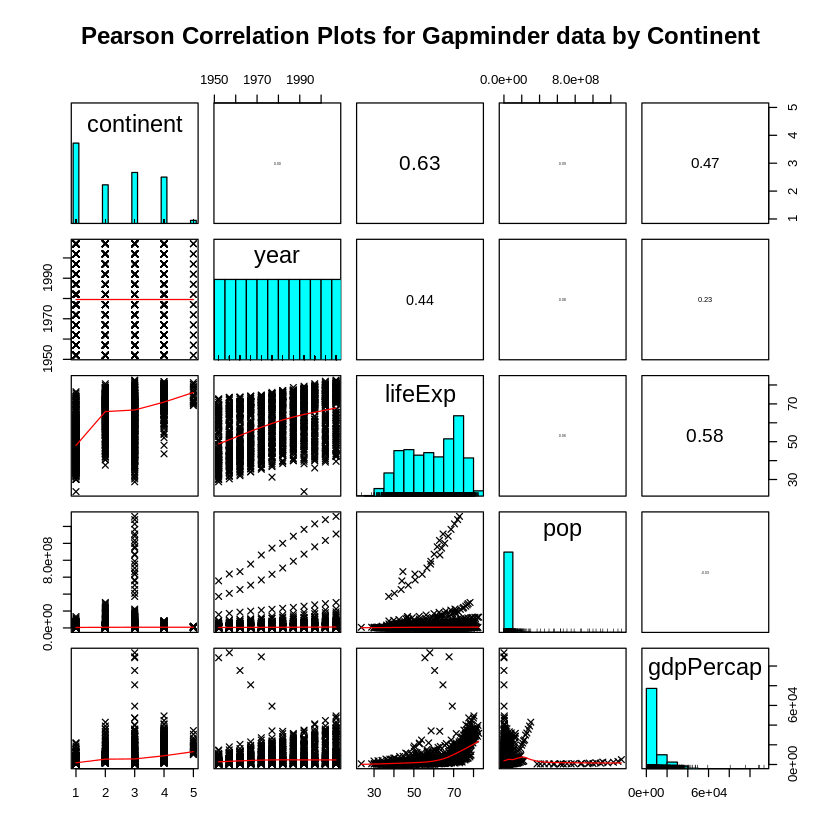

In [29]:
pairs.panels(x=data1[2:6],
             smooth=TRUE,
             scale=TRUE,
             density=FALSE,
             ellipses=FALSE,
             method="pearson",
             pch=4,
             main="Pearson Correlation Plots for Gapminder data by Continent"
)

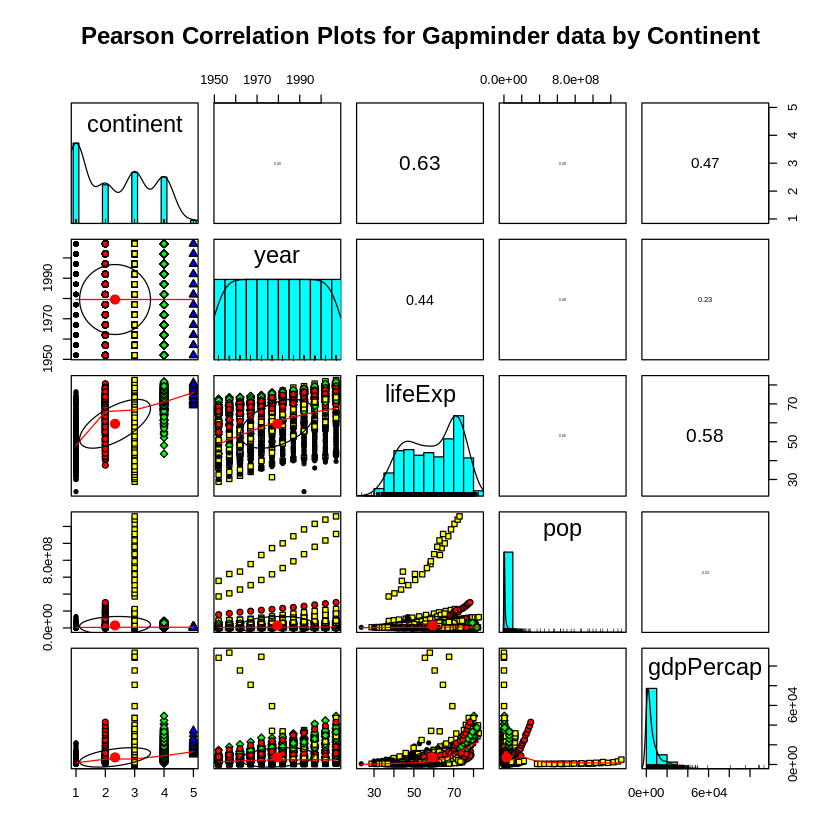

In [32]:
pairs.panels(x=data1[2:6],
             smooth=TRUE,
             scale=TRUE,
             density=TRUE,
             ellipses=TRUE,
             method="pearson",
             pch=19 + as.numeric(data1$continent),
             bg=c("black","red","yellow","green","blue")[data1$continent],
             main="Pearson Correlation Plots for Gapminder data by Continent"
)

# References:
1. https://www.youtube.com/watch?v=X12BoYpIjyw&list=PPSV
2. https://r-graph-gallery.com/correlogram.html